## Credit Card Clustering

Credit card clustering means grouping credit card holders based on their buying habits, credit limits, and many more financial factors. It is also known as credit card segmentation. Such clustering analysis helps businesses find their potential customers and many more marketing strategies.

For the task of credit card clustering with Machine Learning, we need to have a dataset based on buying history of credit card holders.

- Data Source: https://statso.io/customer-segmentation-case-study/
- Project Source: https://thecleverprogrammer.com/2022/10/03/credit-card-clustering-with-machine-learning/

## ABOUT DATA

`CUST_ID`: Unique identification number of the customer


`BALANCE`: Balance in the bank account of the customer


`BALANCE_FREQUENCY`: How frequently the balance is updated in the account of the customer (1 means frequently updated, and 0 means not frequently updated)


`PURCHASES`: The number of purchases made by the customer


`ONEOFF_PURCHASES`: Maximum amount of one-time purchase


`INSTALLMENTS_PURCHASES`: Amount of purchases on instalments


`CASH_ADVANCE`: Cash in advance paid by the customer


`PURCHASES_FREQUENCY`: The frequency of purchases (1 means high frequency, 0 means low frequency)


`ONEOFF_PURCHASES_FREQUENCY`: The frequency of one-time payment purchases (1 means high frequency, 0 means low frequency)


`PURCHASES_INSTALLMENTS_FREQUENCY`: The frequency of purchases on instalments (1 means high frequency, 0 means low frequency)


`CASH_ADVANCE_FREQUENCY`: Frequency of cash in advance payments



`CASH_ADVANCE_TRX`: Number of cash in advance transactions


`PURCHASES_TRX`: Number of transactions on purchases


`CREDIT_LIMIT`: Credit limit of the customer


`PAYMENTS`: Amount of payments made by the customer


`MINIMUM_PAYMENTS`: Amount of minimum payments made by the customer


`PRC_FULL_PAYMENT`: Percentage of full payment made by the customer


`TENURE`: The tenure of the credit card service of the customer


In [34]:
from sklearn.cluster import KMeans, DBSCAN
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
pd.options.display.max_columns =1000
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.datasets import load_iris
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')

In [85]:
data = pd.read_csv("/Users/USER/Documents/DATASETS/Credit_card_clustering.csv")

In [86]:
df = data.copy()
df = df.iloc[:,1:]

In [87]:
df.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [88]:
df.shape

(8950, 17)

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

### Check for Duplicates

In [90]:
df[df.duplicated()]

Empty DataFrame
Columns: [BALANCE, BALANCE_FREQUENCY, PURCHASES, ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES, CASH_ADVANCE, PURCHASES_FREQUENCY, ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, CASH_ADVANCE_FREQUENCY, CASH_ADVANCE_TRX, PURCHASES_TRX, CREDIT_LIMIT, PAYMENTS, MINIMUM_PAYMENTS, PRC_FULL_PAYMENT, TENURE]
Index: []

### Check for whitespaces

In [91]:
[i for i in df.columns if i.startswith(' ' or i.endswith(' '))]

[]

In [92]:
for i in df.columns:
    print(df[df[i]==' '])

Empty DataFrame
Columns: [BALANCE, BALANCE_FREQUENCY, PURCHASES, ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES, CASH_ADVANCE, PURCHASES_FREQUENCY, ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, CASH_ADVANCE_FREQUENCY, CASH_ADVANCE_TRX, PURCHASES_TRX, CREDIT_LIMIT, PAYMENTS, MINIMUM_PAYMENTS, PRC_FULL_PAYMENT, TENURE]
Index: []
Empty DataFrame
Columns: [BALANCE, BALANCE_FREQUENCY, PURCHASES, ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES, CASH_ADVANCE, PURCHASES_FREQUENCY, ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, CASH_ADVANCE_FREQUENCY, CASH_ADVANCE_TRX, PURCHASES_TRX, CREDIT_LIMIT, PAYMENTS, MINIMUM_PAYMENTS, PRC_FULL_PAYMENT, TENURE]
Index: []
Empty DataFrame
Columns: [BALANCE, BALANCE_FREQUENCY, PURCHASES, ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES, CASH_ADVANCE, PURCHASES_FREQUENCY, ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, CASH_ADVANCE_FREQUENCY, CASH_ADVANCE_TRX, PURCHASES_TRX, CREDIT_LIMIT, PAYMENTS, MINIMUM_PAYMENTS, PRC_FULL_PAYMENT, T

### Check for null values

In [93]:
total = np.product(df.shape)
null = df.isnull().sum().sum()

(null/total) * 100

0.20637528754518566

In [94]:
df.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [95]:
df.isnull().mean()

BALANCE                             0.000000
BALANCE_FREQUENCY                   0.000000
PURCHASES                           0.000000
ONEOFF_PURCHASES                    0.000000
INSTALLMENTS_PURCHASES              0.000000
CASH_ADVANCE                        0.000000
PURCHASES_FREQUENCY                 0.000000
ONEOFF_PURCHASES_FREQUENCY          0.000000
PURCHASES_INSTALLMENTS_FREQUENCY    0.000000
CASH_ADVANCE_FREQUENCY              0.000000
CASH_ADVANCE_TRX                    0.000000
PURCHASES_TRX                       0.000000
CREDIT_LIMIT                        0.000112
PAYMENTS                            0.000000
MINIMUM_PAYMENTS                    0.034972
PRC_FULL_PAYMENT                    0.000000
TENURE                              0.000000
dtype: float64

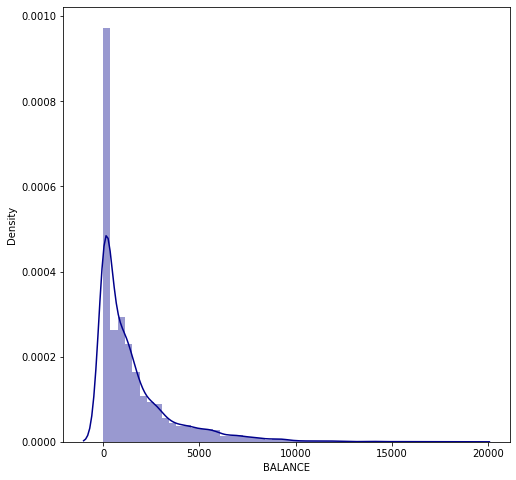

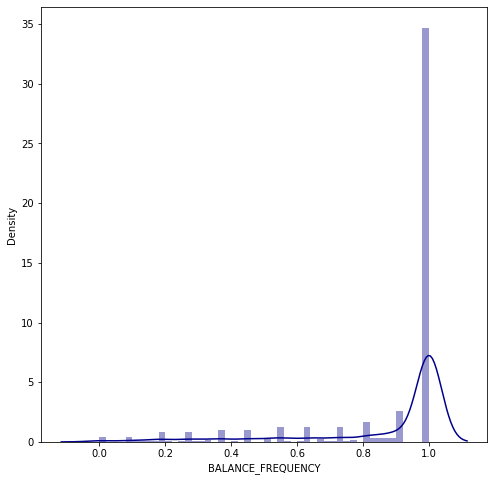

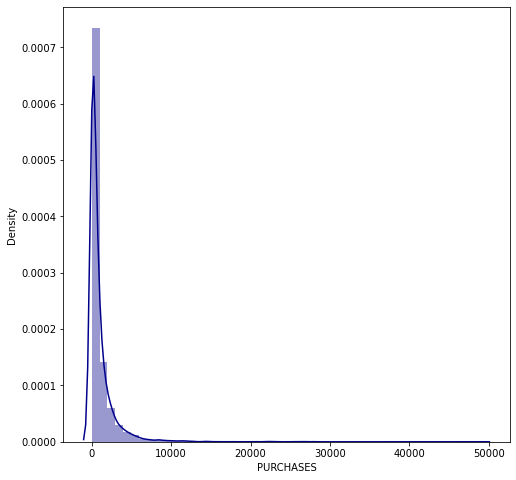

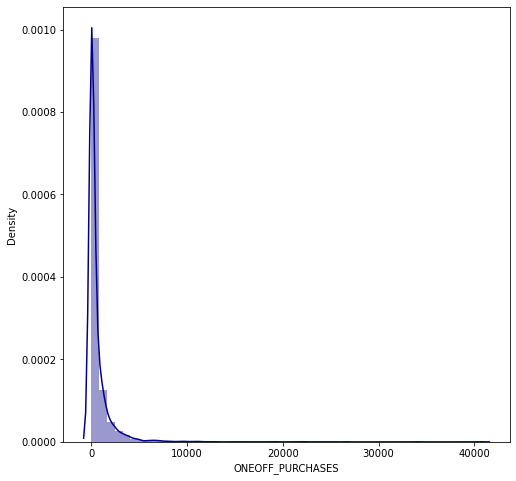

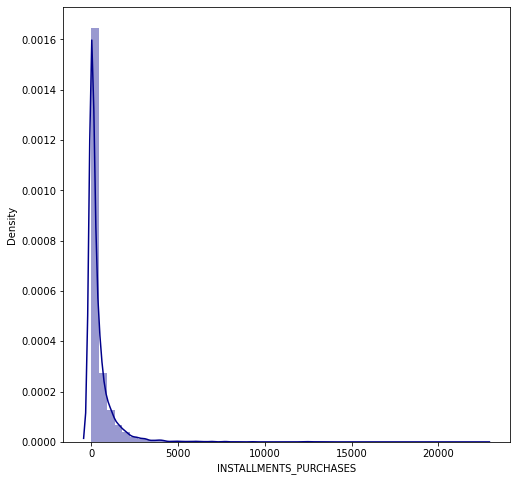

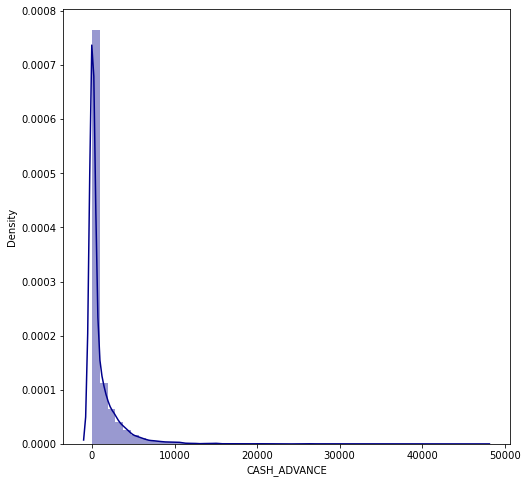

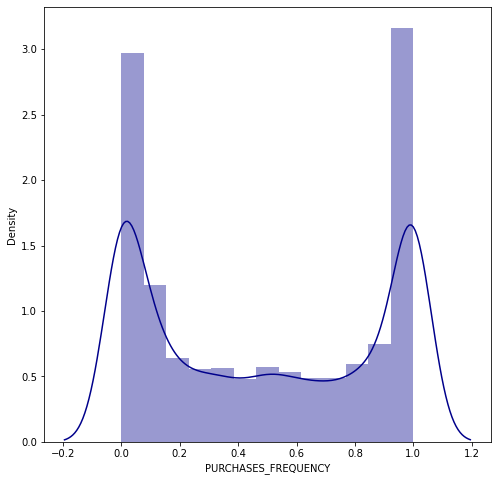

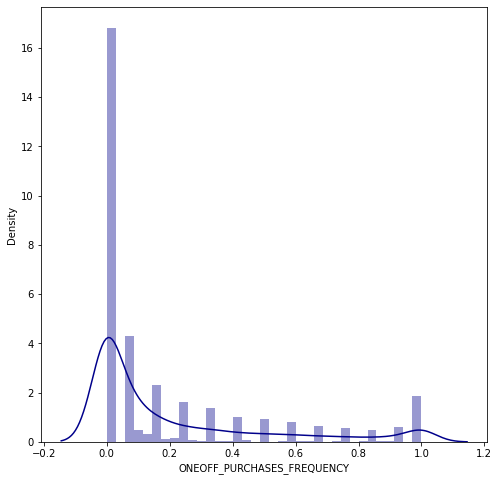

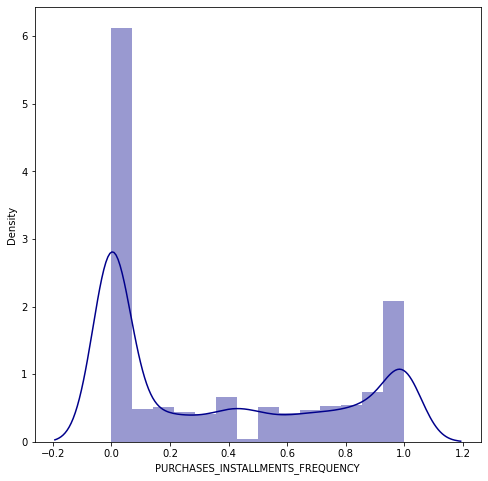

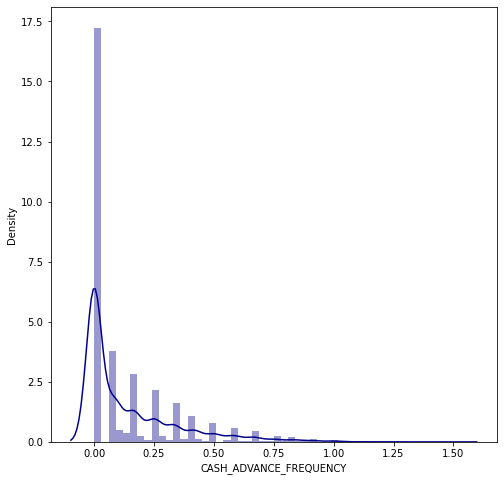

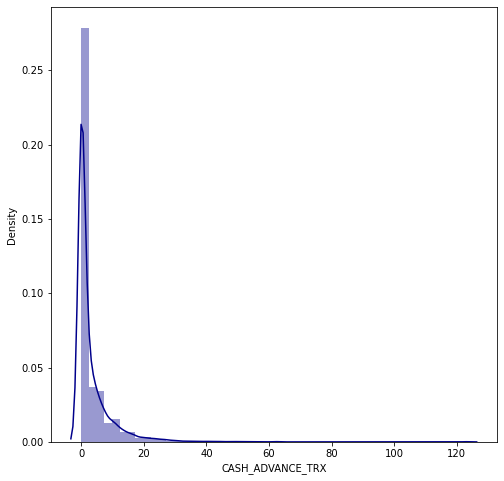

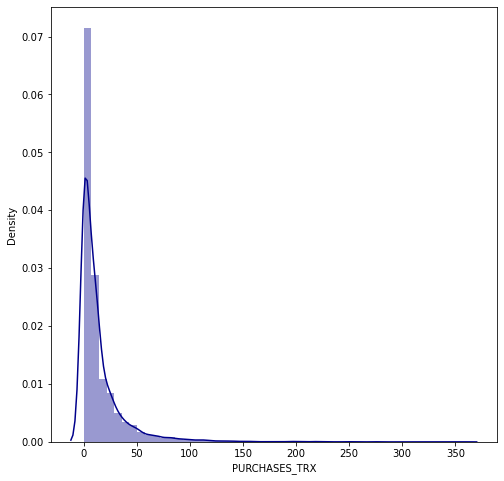

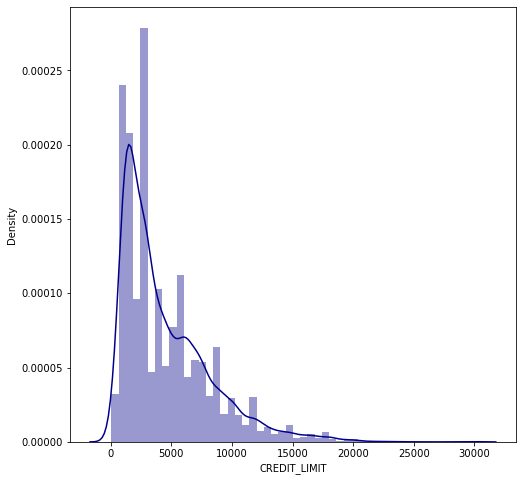

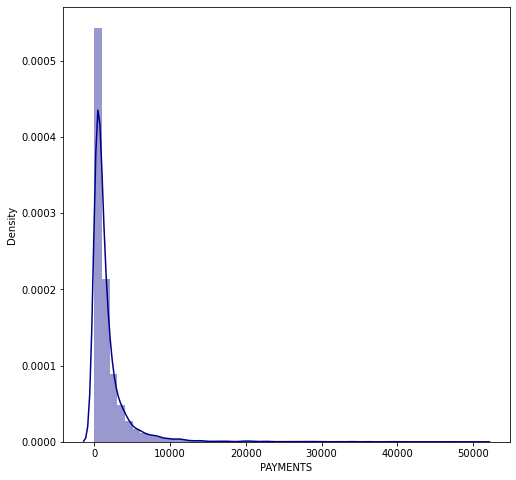

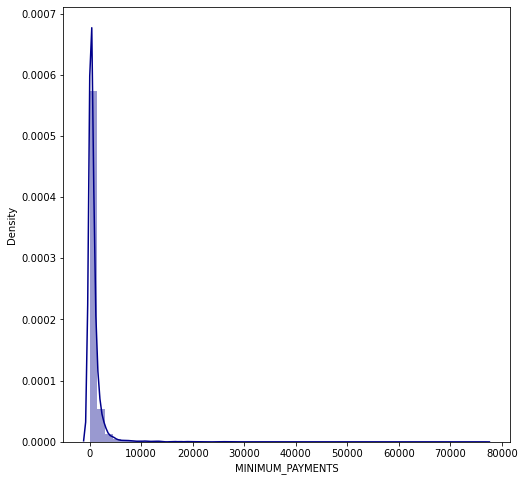

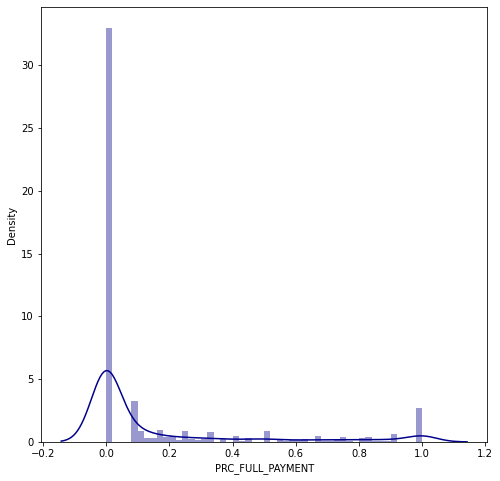

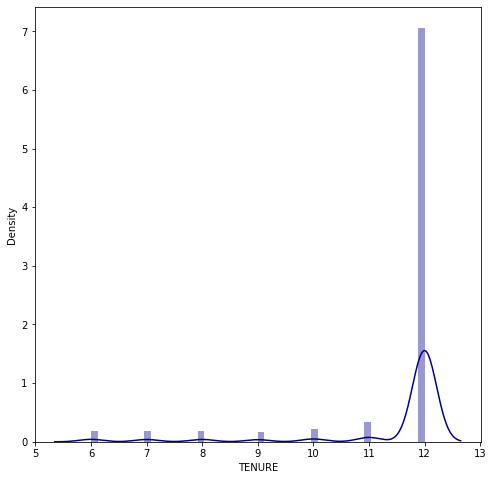

In [96]:
for i in df.columns:
    plt.figure(figsize=(8,8))
    
    sns.distplot(x =df[i], color='darkblue')
    plt.xlabel(i.upper())

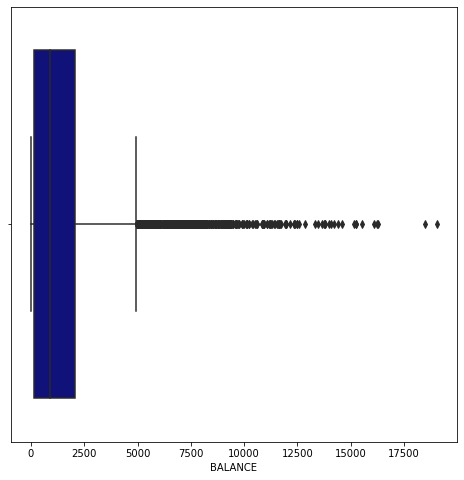

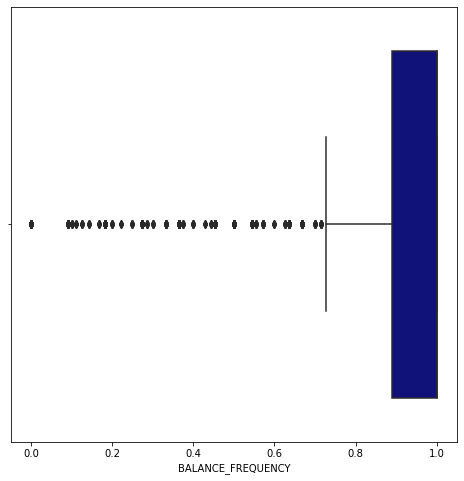

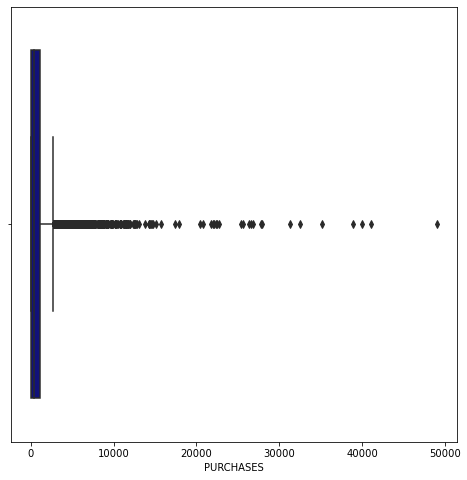

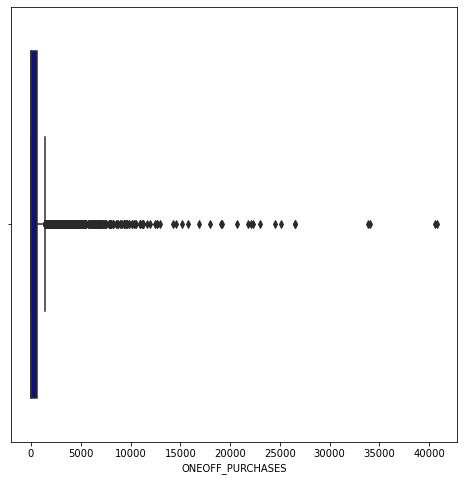

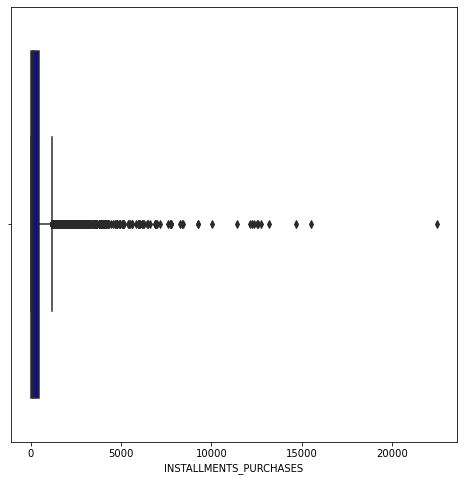

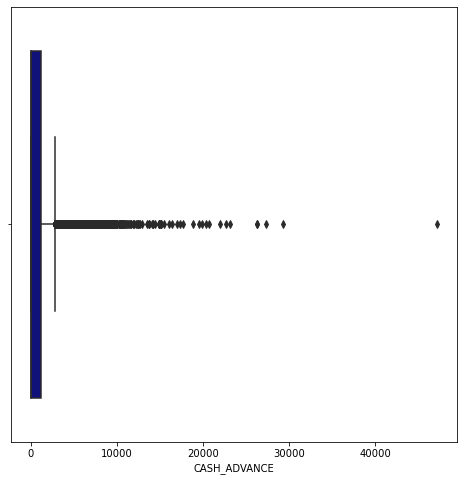

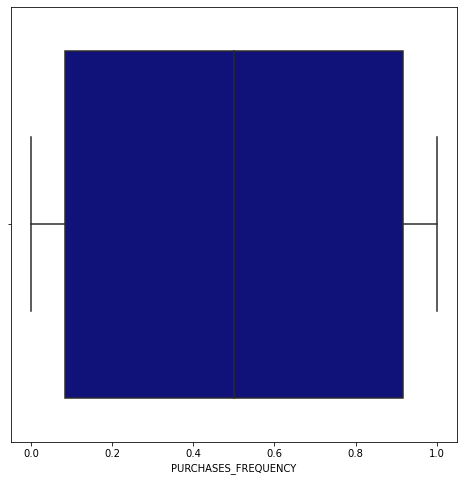

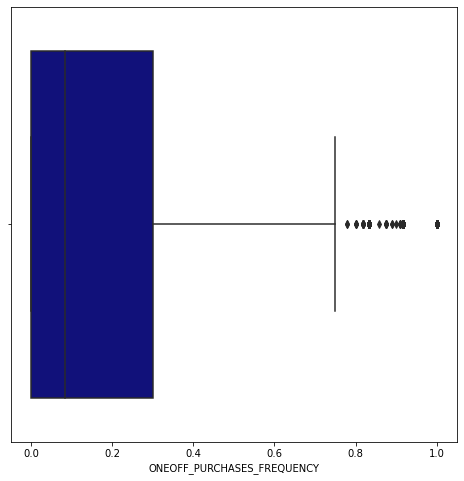

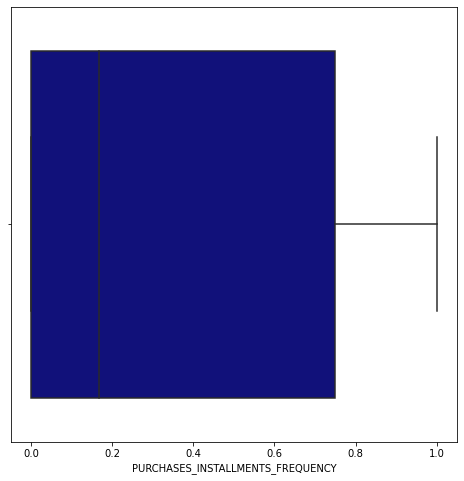

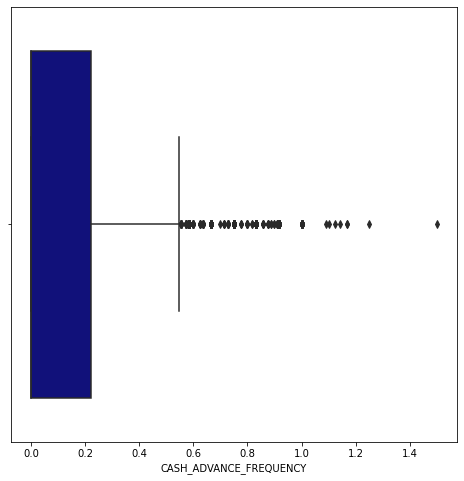

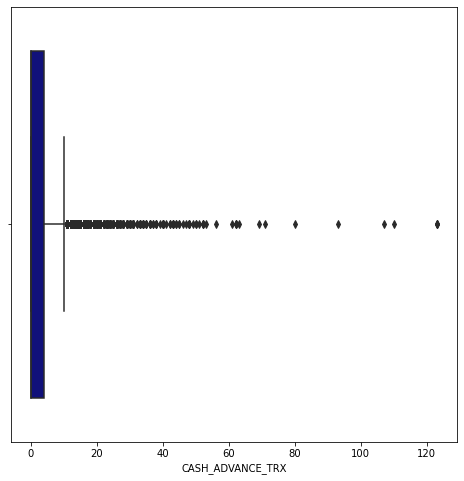

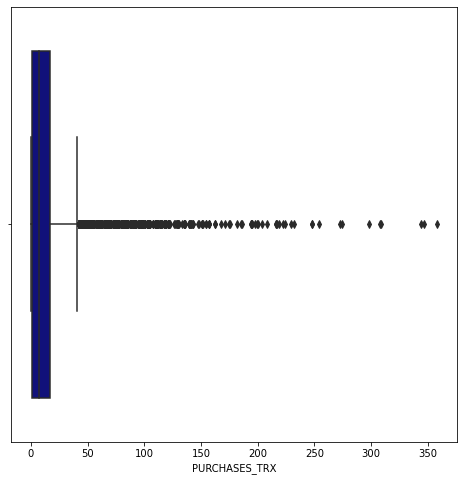

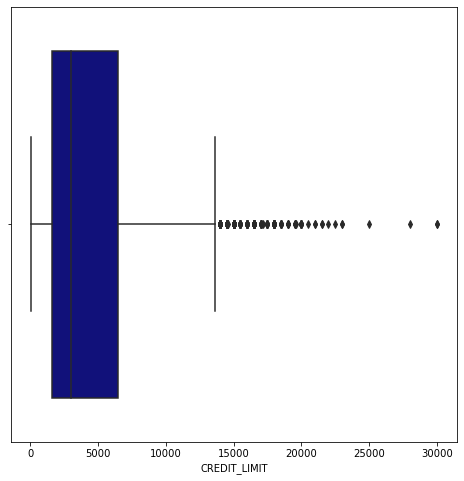

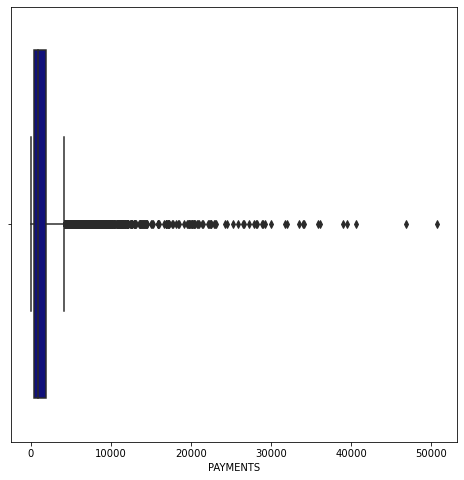

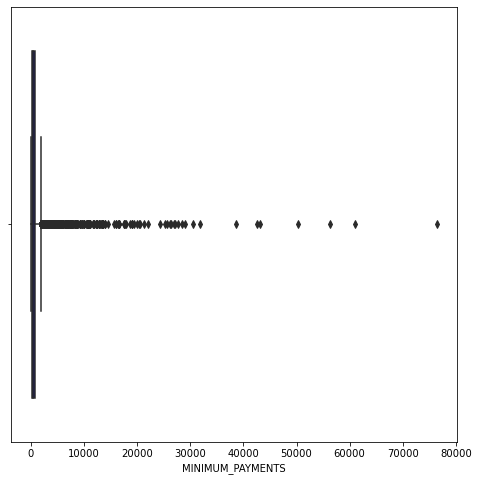

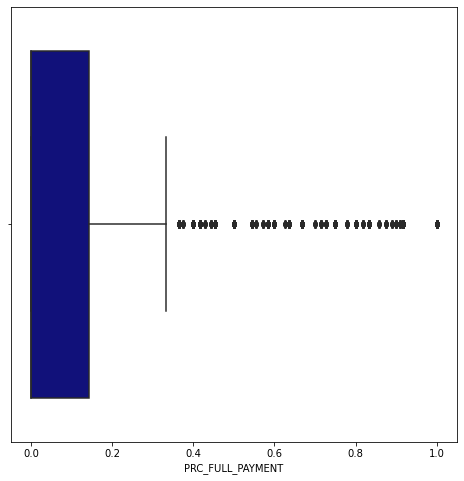

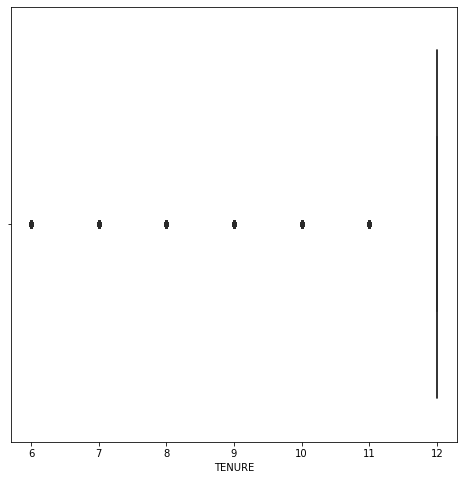

In [97]:
 for i in df.columns:
    plt.figure(figsize=(8,8))
    
    sns.boxplot(x =df[i], color='darkblue')
    plt.xlabel(i.upper())

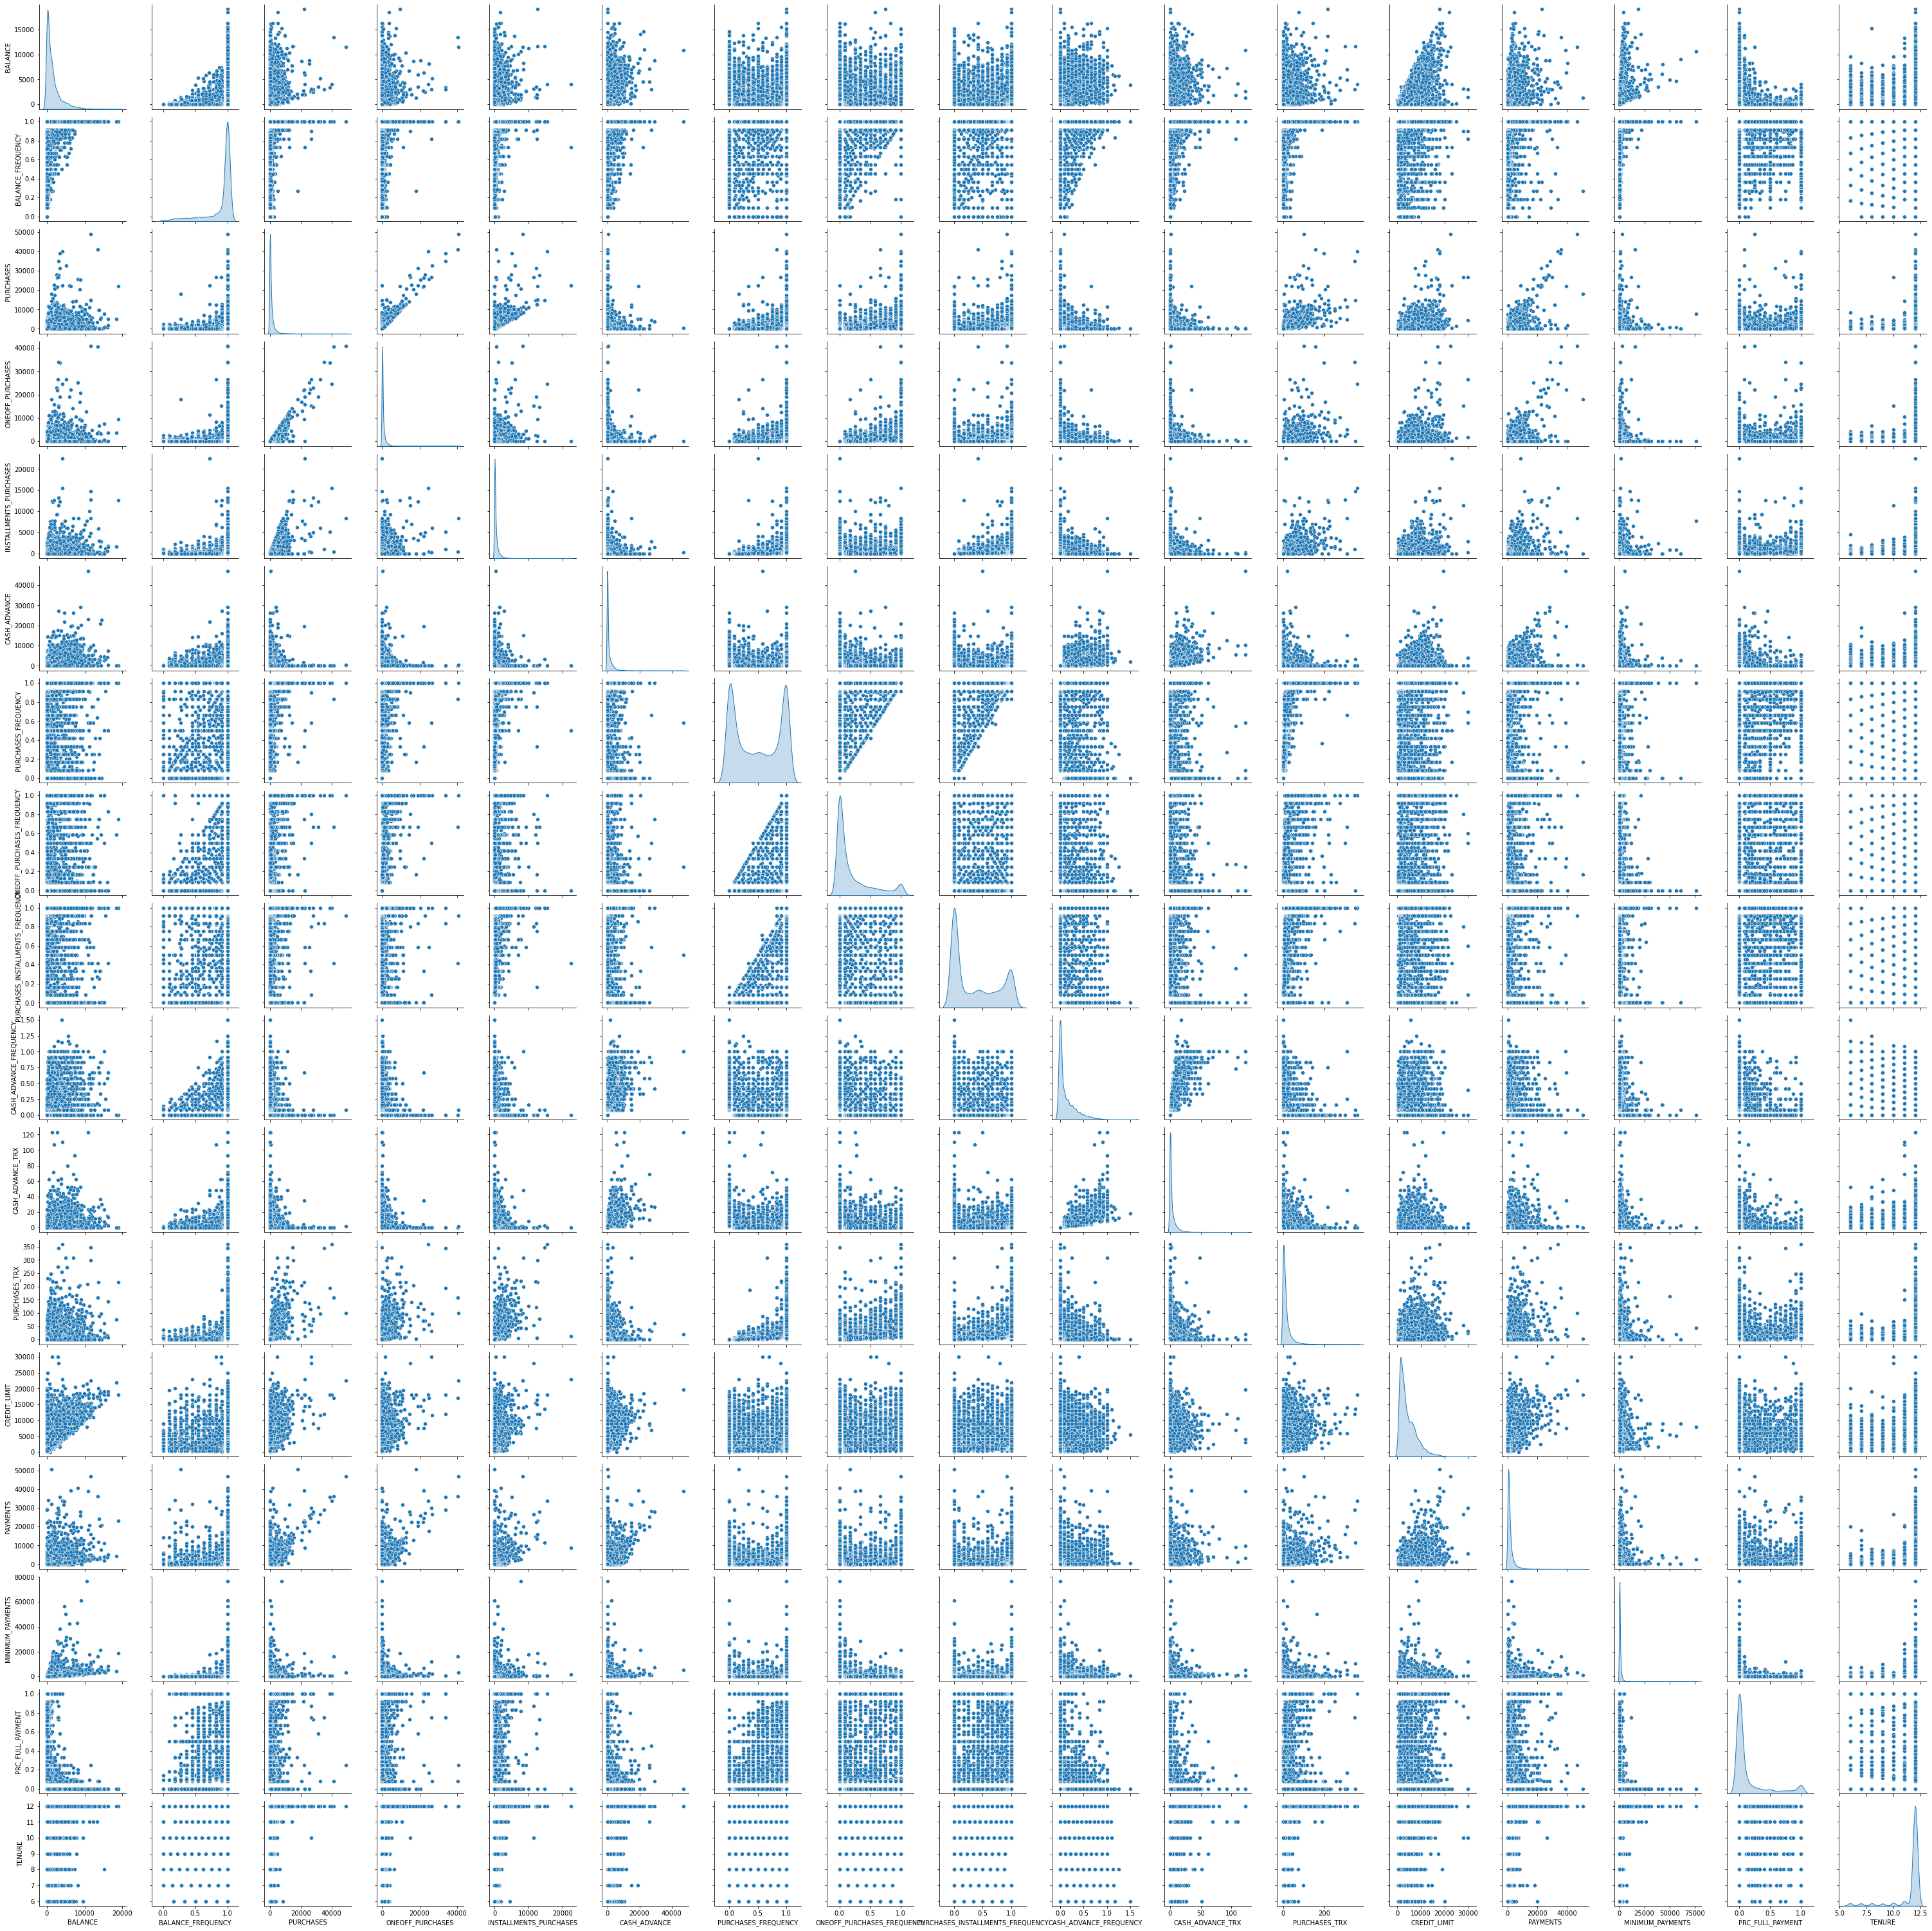

In [98]:
sns.pairplot(df, diag_kind='kde')

### STATS

In [99]:
def stats():
    
    skews = []
    kurts = []
    means = []
    medians = []
    type_skewss = []
    column_name = []
    
    for i in df.columns:
        skew = df[i].skew()
        kurt = df[i].kurt()
        mean = df[i].mean()
        median = df[i].median()
        
        if mean>median:
            type_skew = 'left_skewed'
        elif mean==median:
            type_skew = 'normal'
        else:
            type_skew = 'right_skewed'
        
        skews.append(skew)
        kurts.append(kurt)
        means.append(mean)
        medians.append(median)
        type_skewss.append(type_skew)
        column_name.append(i)
        
    return pd.DataFrame({'Feature':column_name,
                         'Skew':skews,
                         'Kurtosis':kurts,
                         'Mean':means,
                         'Median':medians,
                         'Type_of_skew':type_skewss})

stats()

Feature       Skew    Kurtosis         Mean  \
0                            BALANCE   2.393386    7.674751  1564.474828   
1                  BALANCE_FREQUENCY  -2.023266    3.092370     0.877271   
2                          PURCHASES   8.144269  111.388771  1003.204834   
3                   ONEOFF_PURCHASES  10.045083  164.187572   592.437371   
4             INSTALLMENTS_PURCHASES   7.299120   96.575178   411.067645   
5                       CASH_ADVANCE   5.166609   52.899434   978.871112   
6                PURCHASES_FREQUENCY   0.060164   -1.638631     0.490351   
7         ONEOFF_PURCHASES_FREQUENCY   1.535613    1.161846     0.202458   
8   PURCHASES_INSTALLMENTS_FREQUENCY   0.509201   -1.398632     0.364437   
9             CASH_ADVANCE_FREQUENCY   1.828686    3.334734     0.135144   
10                  CASH_ADVANCE_TRX   5.721298   61.646862     3.248827   
11                     PURCHASES_TRX   4.630655   34.793100    14.709832   
12                      CREDIT_LIMIT   1.522464    2.836656  4494.449450   
13                          PAYMENTS   5.907620   54.770736  1733.143852   
14                  MINIMUM_PAYMENTS  13.622797  283.989986   864.206542   
15                  PRC_FULL_PAYMENT   1.942820    2.432395     0.153715   
16                            TENURE  -2.943017    7.694823    11.517318   

         Median  Type_of_skew  
0    873.385231   left_skewed  
1      1.000000  right_skewed  
2    361.280000   left_skewed  
3     38.000000   left_skewed  
4     89.000000   left_skewed  
5      0.000000   left_skewed  
6      0.500000  right_skewed  
7      0.083333   left_skewed  
8      0.166667   left_skewed  
9      0.000000   left_skewed  
10     0.000000   left_skewed  
11     7.000000   left_skewed  
12  3000.000000   left_skewed  
13   856.901546   left_skewed  
14   312.343947   left_skewed  
15     0.000000   left_skewed  
16    12.000000  right_skewed

### Correlation

<AxesSubplot:>

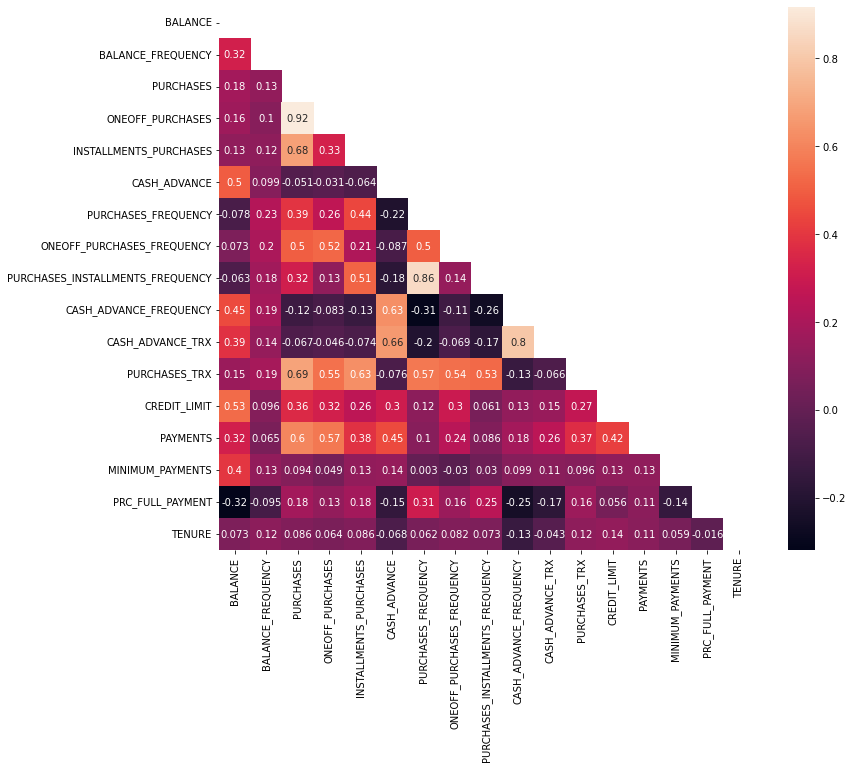

In [100]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), mask = np.triu(df.corr()), annot=True)

<AxesSubplot:>

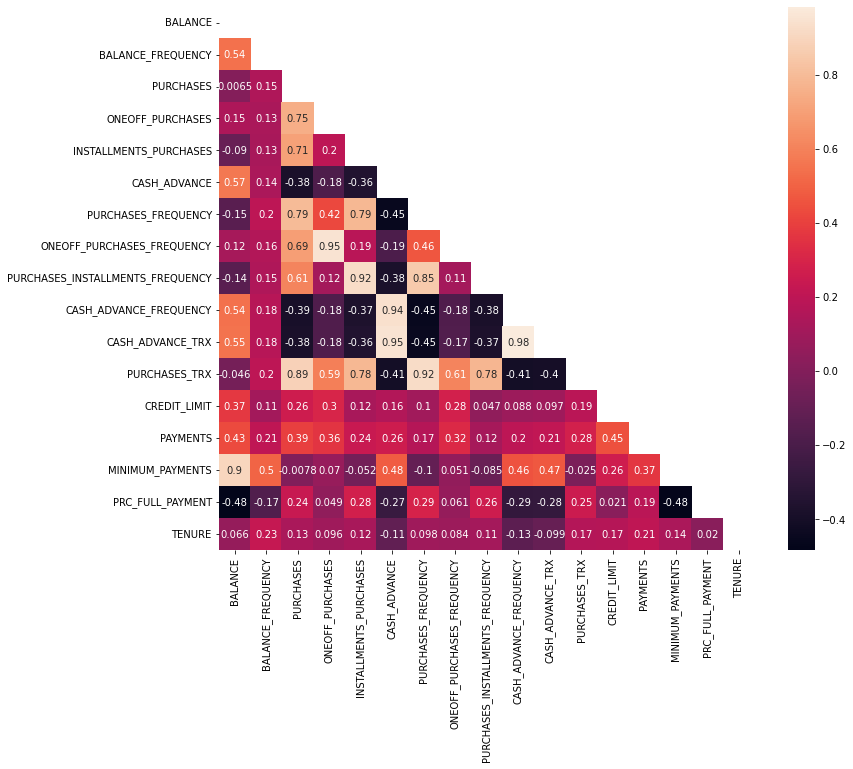

In [101]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(method='spearman'), mask = np.triu(df.corr(method='spearman')), annot=True)

### FEATURE SELECTION

In [102]:
df = df[['BALANCE','PURCHASES','CREDIT_LIMIT']]

### EXPERIMENT 0 
- StandardScaler
- Dropping null values

In [103]:
df_copy = df.dropna()

In [104]:
scaler = StandardScaler()

In [105]:
scaled_data = scaler.fit_transform(df_copy)

#### ELBOW METHOD

In [106]:
wcss = []

for i in range(2, 15):
    kmeans = KMeans(n_clusters =i)
    kmeans.fit(scaled_data)
    
    wcss.append(kmeans.inertia_)

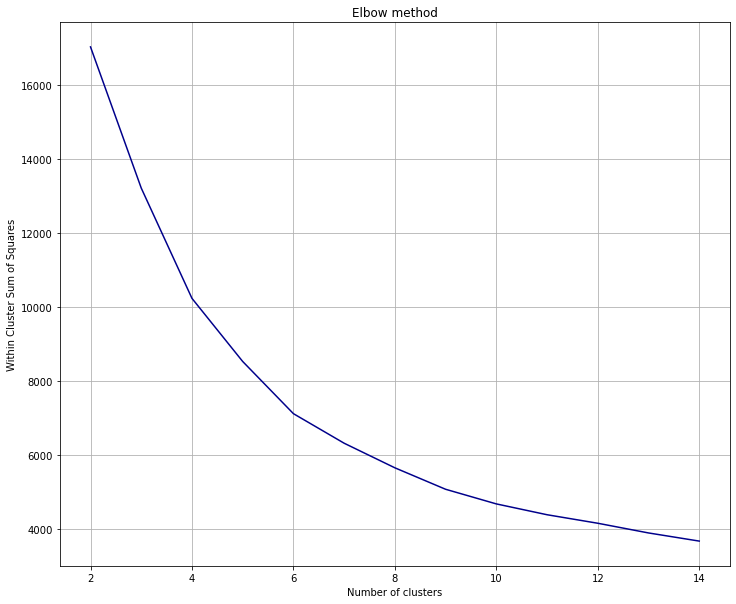

In [107]:
plt.figure(figsize=(12, 10))
plt.plot(range(2, 15), wcss, color='darkblue')
plt.title('Elbow method')

plt.xlabel('Number of clusters');plt.ylabel('Within Cluster Sum of Squares');plt.grid(True)

### SILHOUETTE SCORE

In [108]:
silhouette_scores = []

for i in range(2, 15):
    kmeans = KMeans(n_clusters =i)
    kmeans.fit(scaled_data)
    
    score = silhouette_score(scaled_data, kmeans.labels_)
    
    silhouette_scores.append(score)

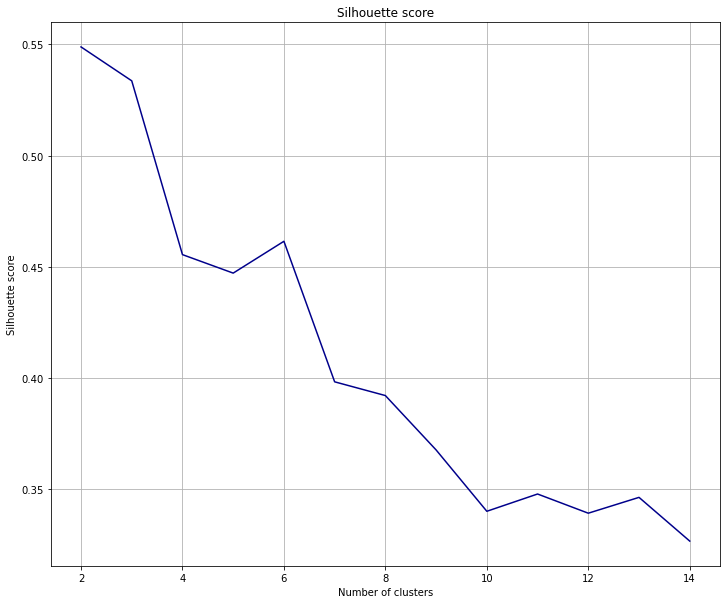

In [109]:
plt.figure(figsize=(12, 10))
plt.plot(range(2, 15), silhouette_scores, color='darkblue')
plt.title('Silhouette score')

plt.xlabel('Number of clusters');plt.ylabel('Silhouette score');plt.grid(True)

### KMEANS

In [115]:
kmeans = KMeans(n_clusters= 3)
clusters = kmeans.fit_predict(scaled_data)

In [116]:
centroids = kmeans.cluster_centers_

In [117]:
df_copy['Clusters'] = clusters

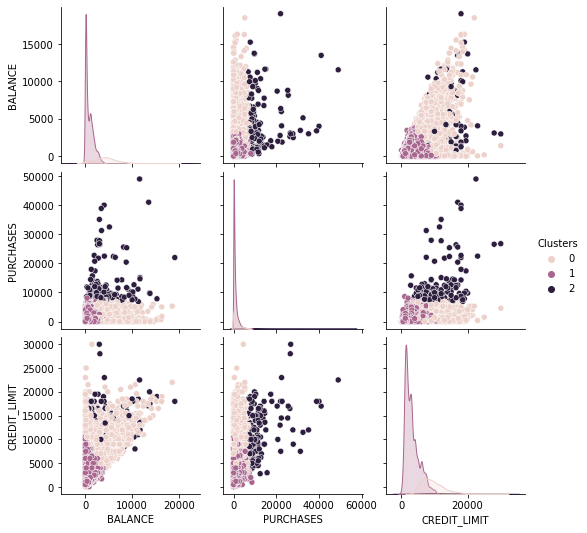

In [118]:
sns.pairplot(df_copy, hue='Clusters', diag_kind='kde')

### DBSCAN

In [127]:
dbscan = DBSCAN(eps = 0.05, min_samples= 8)
dbscan.fit(scaled_data)

DBSCAN(eps=0.05, min_samples=8)

In [128]:
dbscan.labels_

array([ 0, -1, -1, ...,  0, 21, -1], dtype=int64)

In [129]:
len(dbscan.core_sample_indices_)

3536

In [130]:
centroids = dbscan.components_
centroids

array([[-0.73205404, -0.4249337 , -0.96037969],
       [-0.35884931, -0.4620954 , -0.90541368],
       [ 0.58041983, -0.4695839 , -0.4107196 ],
       ...,
       [-0.7424878 , -0.32917446, -0.96037969],
       [-0.74046257, -0.40200016, -0.96037969],
       [-0.74523857, -0.4695839 , -1.09779471]])

In [131]:
df_copy['DBSCAN_Clusters'] = dbscan.labels_

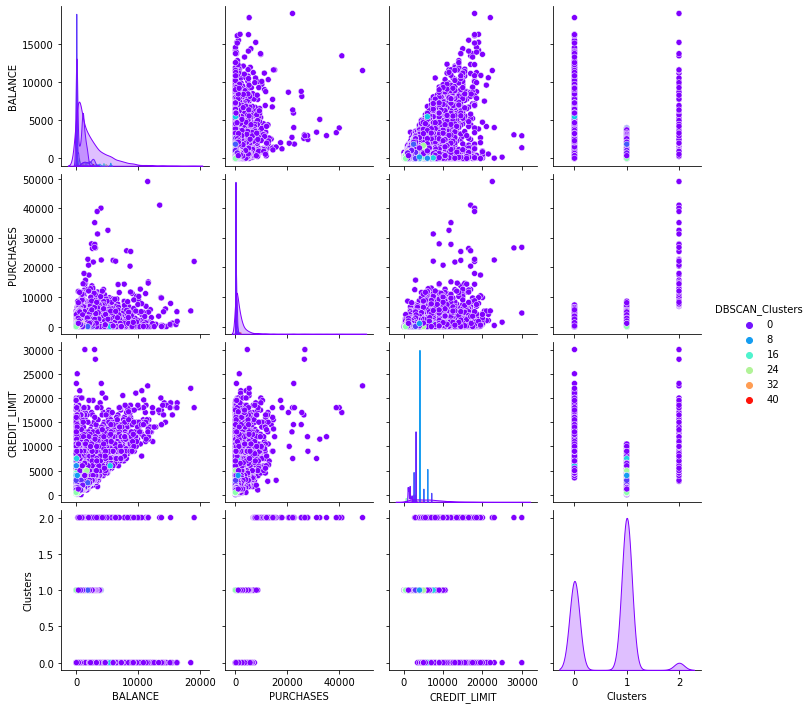

In [132]:
sns.pairplot(df_copy, hue='DBSCAN_Clusters', diag_kind='kde', palette = 'rainbow')

DBSCAN does not have a predict method so it cant predict for new instances, we have to use a classifcation algorithm here to predict clusters of new instances.

In [133]:
from sklearn.neighbors import KNeighborsClassifier

In [134]:
kn = KNeighborsClassifier(n_neighbors = 50)
kn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])
#we only trained with for core instances, we can choose to train with all instances

KNeighborsClassifier(n_neighbors=50)

In [136]:
kn.predict(scaled_data)

array([ 0, 13, 12, ...,  0, 21,  0], dtype=int64)

### EXPERIMENT 1
- Without scaling
- Imputing null values

In [137]:
df_copy_2 = df.copy()

In [139]:
median_imputer = SimpleImputer(strategy = 'median')

In [140]:
data_imputed = median_imputer.fit_transform(df_copy_2)

### ELBOW METHOD

In [144]:
wcss = []

for i in range(2, 15):
    kmeans = KMeans(n_clusters = i)
    
    kmeans.fit(data_imputed)
    
    wcss.append(kmeans.inertia_)

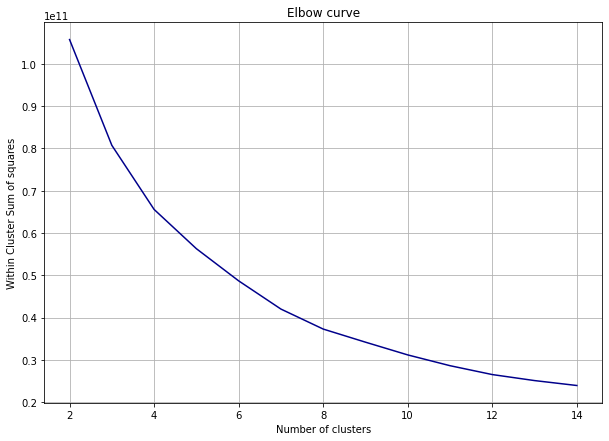

In [145]:
plt.figure(figsize=(10,7))
plt.plot(range(2, 15), wcss, color='darkblue')
plt.title('Elbow curve')
plt.xlabel('Number of clusters');plt.ylabel('Within Cluster Sum of squares');plt.grid(True)

### SILHOUETTE SCORE

In [147]:
scores = []
for i in range(2, 15):
    kmeans = KMeans(n_clusters= i)
    kmeans.fit(data_imputed)
    score = silhouette_score(data_imputed, kmeans.labels_)
    scores.append(score)

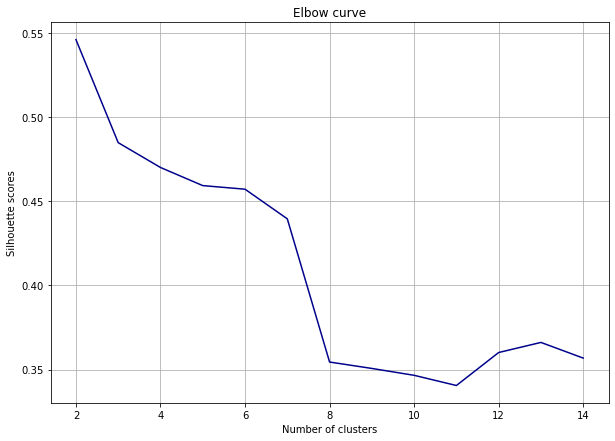

In [148]:
plt.figure(figsize=(10,7))
plt.plot(range(2, 15), scores, color='darkblue')
plt.title('Elbow curve')
plt.xlabel('Number of clusters');plt.ylabel('Silhouette scores');plt.grid(True)

### KMEANS

In [153]:
kmeans = KMeans(n_clusters =3 )
clusters = kmeans.fit_predict(data_imputed)

In [154]:
df_copy_2['Clusters'] = clusters

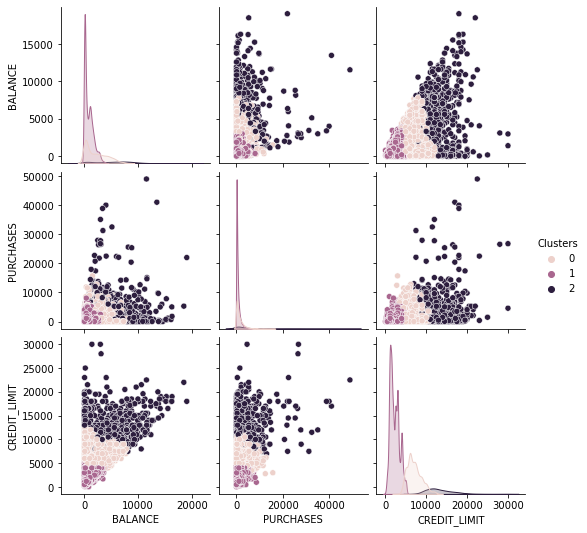

In [155]:
sns.pairplot(df_copy_2, hue = 'Clusters', diag_kind='kde')

### DBSCAN

In [163]:
dbscan = DBSCAN(eps=0.1, min_samples=10)
dbscan.fit(data_imputed)

DBSCAN(eps=0.1, min_samples=10)

In [164]:
dbscan.labels_

array([-1, -1, -1, ..., -1, -1, -1], dtype=int64)

In [165]:
df_copy_2['DBSCAN_Clusters'] = dbscan.labels_

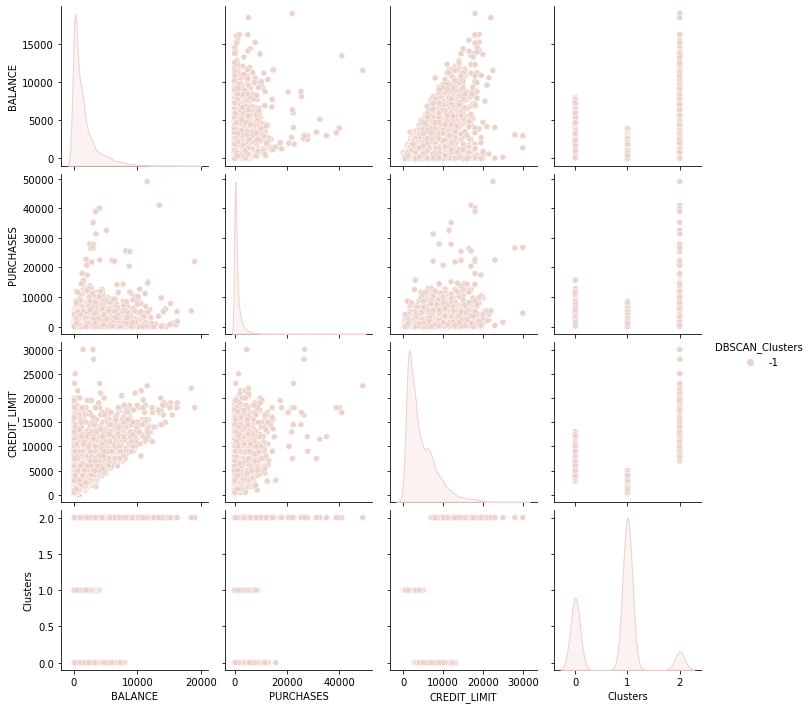

In [166]:
sns.pairplot(df_copy_2, hue = 'DBSCAN_Clusters', diag_kind='kde')

### EXPERIMENT 2
- StandardScaler
- SimpleImputer

In [168]:
df_copy_3 = df.copy()

In [169]:
from sklearn.pipeline import Pipeline 

In [170]:
preprocessor = Pipeline([('imputer',SimpleImputer(strategy='median')),
                        ('scaler',StandardScaler())])

In [171]:
df_processed = preprocessor.fit_transform(df_copy_3)

### ELBOW METHOD

In [177]:
wcss = []

for i in range(2, 15):
    kmeans = KMeans(n_clusters = i)
    
    kmeans.fit(df_processed)
    
    wcss.append(kmeans.inertia_)

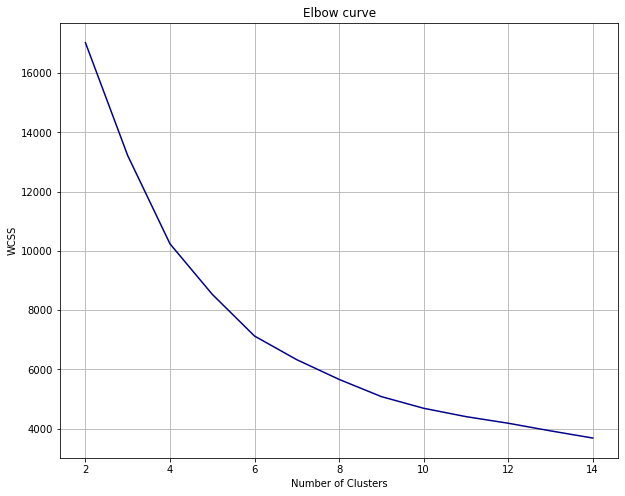

In [178]:
plt.figure(figsize=(10,8))
plt.plot(range(2, 15), wcss, color='darkblue')
plt.title('Elbow curve')
plt.xlabel('Number of Clusters');plt.ylabel('WCSS');plt.grid(True)

### SILHOUETTE SCORE

In [174]:
scores = []

for i in range(2, 15):

    kmeans = KMeans(n_clusters= i)

    kmeans.fit(data_imputed)

    score = silhouette_score(data_imputed, kmeans.labels_)
    scores.append(score)

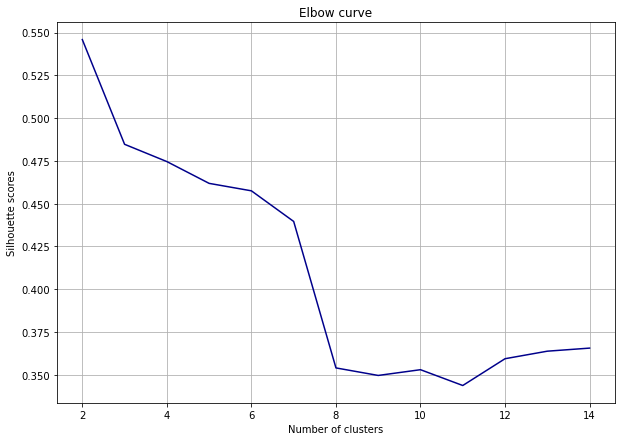

In [175]:
plt.figure(figsize=(10,7))
plt.plot(range(2, 15), scores, color='darkblue')
plt.title('Elbow curve')
plt.xlabel('Number of clusters');plt.ylabel('Silhouette scores');plt.grid(True)

### KMEANS

In [179]:
kmeans = KMeans(n_clusters = 3)
clusters = kmeans.fit_predict(data_imputed)

In [180]:
df_copy_3['Clusters'] = clusters

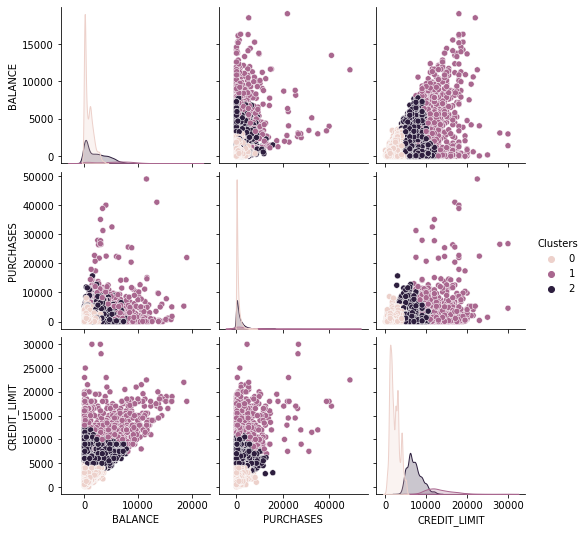

In [181]:
sns.pairplot(df_copy_3, hue = 'Clusters', diag_kind='kde')

### EDA

<AxesSubplot:xlabel='Clusters', ylabel='count'>

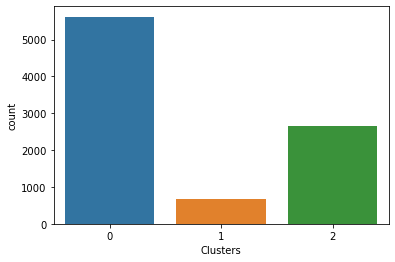

In [182]:
sns.countplot(x=df_copy_3['Clusters'])

In [183]:
df_copy_3.groupby('Clusters').median()

BALANCE  PURCHASES  CREDIT_LIMIT
Clusters                                      
0          545.767741    258.900        2000.0
1         5643.992345   1490.940       12500.0
2         1727.957186    665.355        7000.0

In [184]:
df_copy_3.groupby('Clusters').mean()

BALANCE    PURCHASES  CREDIT_LIMIT
Clusters                                        
0          805.059624   548.540514   2247.987050
1         5489.730712  3681.097748  13185.555556
2         2174.544585  1285.077638   7041.028979

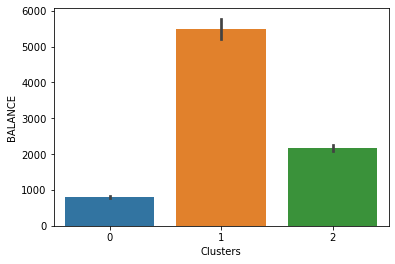

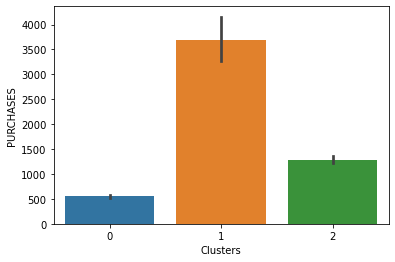

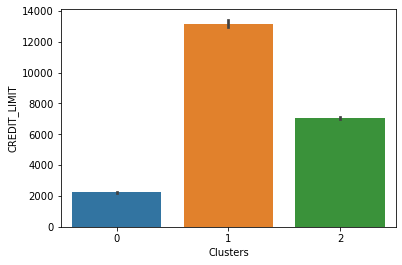

In [193]:
for i in df_copy_3.iloc[:,:-1].columns:
    plt.figure()
    sns.barplot(data=df_copy_3,y = i, x='Clusters')